Project 1, Group 3 - Places to Bike
Overview
Biking is becoming more prevalent as a form of commuting to work, exercise, traveling, and for leisure. In this project, our group explored cities that were considered "bike-friendly" based on the Places for Bikes city ratings. Citites were rated on five factors: Ridership, Safety, Network, Acceleration, and Reach. Each factors were scored on a five-point scale and weighted at 20% each.

People for Bikes organization defined the five factors as:

Ridership - reflects how many people in the community ride bikes

Safety - considers fatalities and injuries of people on bikes as well as those walking and driving.

Network - evaluates the quality of the bike network -- how completely it connects people to each other and local destinations using comfortable route

Reach - determines how well a community's low-stress network serves all members of the community

Acceleration - assesses how quickly a community is improving its biking infrastructure and how successful its encouragement programs are at getting people to ride

Some abbreviations to keep in mind:

ACS - U.S. Census American Community Survey
FARS - Fatality Analysis Reporting System
BNA - PlacesForBikes Bike Network Analysis

In [3]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt    
import pandas as pd
import numpy as np
import requests
import time
# import gmaps  

#from config import gkey

from datetime import datetime

In [4]:
# Store filepath as variable
places_for_bikes = "data/places_for_bikes_results.csv"


In [5]:
# Read data with Pandas
bike_data = pd.read_csv(places_for_bikes, encoding="ISO-8859-1")

# Display 10 rows of data
bike_data.head(5)

,Places_ID_2019,City,City_Alt,ACS Bike-to-Work Mode Share,Land Area,Population,ACS Target,ACS Normalized Score,ACS Ridership Points,SMS Recreation Riding,...,ACS Bike-to-Work Mode Share Men,ACS Bike-to-Work Mode Share Women,ACS Gap,ACS Tier,ACS_Target,Distance.1,ACS Points,Total Reach Points,Bonus,Total Ponts
0,363,"SPRINGDALE, ARKANSAS","SPRINGDALE, AR",0.30%,41.8,"77,252",12.60%,1.7,0.1,12.40%,...,0.01,0.00,0.01,1.0,-0.02,0.03,1.0,4.0,0.5,3.0
1,116,"ENID, OKLAHOMA","ENID, OK",0.70%,73.7,"50,809",11.50%,5.5,0.3,13.00%,...,0.01,0.00,0.01,2.0,-0.05,0.06,1.2,3.8,0.0,2.4
2,108,"DUBUQUE, IOWA","DUBUQUE, IA",0.40%,30.0,"58,410",20.80%,2.0,0.1,16.50%,...,0.00,0.00,0.00,1.0,-0.02,0.02,1.7,3.8,0.0,2.1
3,357,"SOUTH BEND, INDIANA","SOUTH BEND, IN",1.30%,41.5,"101,928",12.60%,7.8,0.4,15.80%,...,0.02,0.01,0.02,3.0,-0.60,0.62,3.1,3.7,0.0,2.0
4,1205,"CRESTED BUTTE, COLORADO","CRESTED BUTTE, CO",41.10%,0.8,"1,385",51.00%,75.6,3.8,18.80%,...,0.36,0.52,-0.16,3.0,-0.60,0.44,3.6,3.6,0.0,2.6


In [6]:
# Renaming column
bike_data_df = bike_data.rename(columns={"Total Ponts":"Total Points", " Population ":"Population"})
bike_data_df.head()

,Places_ID_2019,City,City_Alt,ACS Bike-to-Work Mode Share,Land Area,Population,ACS Target,ACS Normalized Score,ACS Ridership Points,SMS Recreation Riding,...,ACS Bike-to-Work Mode Share Men,ACS Bike-to-Work Mode Share Women,ACS Gap,ACS Tier,ACS_Target,Distance.1,ACS Points,Total Reach Points,Bonus,Total Points
0,363,"SPRINGDALE, ARKANSAS","SPRINGDALE, AR",0.30%,41.8,"77,252",12.60%,1.7,0.1,12.40%,...,0.01,0.00,0.01,1.0,-0.02,0.03,1.0,4.0,0.5,3.0
1,116,"ENID, OKLAHOMA","ENID, OK",0.70%,73.7,"50,809",11.50%,5.5,0.3,13.00%,...,0.01,0.00,0.01,2.0,-0.05,0.06,1.2,3.8,0.0,2.4
2,108,"DUBUQUE, IOWA","DUBUQUE, IA",0.40%,30.0,"58,410",20.80%,2.0,0.1,16.50%,...,0.00,0.00,0.00,1.0,-0.02,0.02,1.7,3.8,0.0,2.1
3,357,"SOUTH BEND, INDIANA","SOUTH BEND, IN",1.30%,41.5,"101,928",12.60%,7.8,0.4,15.80%,...,0.02,0.01,0.02,3.0,-0.60,0.62,3.1,3.7,0.0,2.0
4,1205,"CRESTED BUTTE, COLORADO","CRESTED BUTTE, CO",41.10%,0.8,"1,385",51.00%,75.6,3.8,18.80%,...,0.36,0.52,-0.16,3.0,-0.60,0.44,3.6,3.6,0.0,2.6


In [7]:
# Splitting City column to two new columns - City Name and State
#bike_split = bike_data_df
#bike_split[['City Name','State']] = bike_split["City"].str.split(",", n=1, expand=True)
#bike_split.head()

In [8]:
# Re-organizing columns and keeping columns that are relevant to our research question
bike_df = bike_data_df[['City_Alt', 'Population', 'Total Points']]

bike_df.head(10)

,City_Alt,Population,Total Points
0,"SPRINGDALE, AR","77,252",3.0
1,"ENID, OK","50,809",2.4
2,"DUBUQUE, IA","58,410",2.1
3,"SOUTH BEND, IN","101,928",2.0
4,"CRESTED BUTTE, CO","1,385",2.6
5,"KALAMAZOO, MI","75,833",1.9
6,"SPRINGFIELD, MO","165,785",1.9
7,"SAN JUAN CAPISTRANO, CA","35,948",1.9
8,"CHARLOTTESVILLE, VA","46,487",1.8
9,"BENTONVILLE, AR","44,601",3.1


In [9]:
# Sort dataframe based on Total Points scored and Population size for Bike Friendliness
#bike_total_points = bike_df.sort_values(["Total Points", "Population"], ascending=[False, False])
#bike_total_points.head(10)

In [10]:
obesity_raw_data = "data/obesity_among_adults.csv"  


In [11]:
obesity_data = pd.read_csv(obesity_raw_data, encoding="ISO-8859-1")

obesity_data.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


In [12]:
obesity_data_rn = obesity_data.rename(columns={"StateDesc":"State", "CityName": "City Name", "Data_Value":"Obesity Rank", "PopulationCount" : "Population"})

obesity_data_rn.head()

,Year,StateAbbr,State,City Name,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Population,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


In [13]:
obesity_data_df = obesity_data_rn[['City Name', 'State', 'Population', 'Obesity Rank']]
obesity_data_df = obesity_data_df.sort_values(["Obesity Rank"], ascending=[True])

obesity_data_df['City_Alt'] = obesity_data_df['City Name'] + ", " + obesity_data_rn['StateAbbr']

obesity_data_df['City_Alt'] = obesity_data_df['City_Alt'].str.upper()

obesity_data_df.head()

,City Name,State,Population,Obesity Rank,City_Alt
0,Boulder,Colorado,"97,385",14.9,"BOULDER, CO"
1,Fremont,California,"214,089",15.7,"FREMONT, CA"
2,Milpitas,California,"66,790",16.0,"MILPITAS, CA"
3,Irvine,California,"212,375",16.4,"IRVINE, CA"
4,San Francisco,California,"805,235",17.1,"SAN FRANCISCO, CA"


In [14]:
bike_df.head()

,City_Alt,Population,Total Points
0,"SPRINGDALE, AR","77,252",3.0
1,"ENID, OK","50,809",2.4
2,"DUBUQUE, IA","58,410",2.1
3,"SOUTH BEND, IN","101,928",2.0
4,"CRESTED BUTTE, CO","1,385",2.6


In [15]:
merge_data = pd.merge(bike_df, obesity_data_df, on="City_Alt", how="inner")

merge_data.head()

merge_data[['City_Alt', 'Population_x', 'Total Points', 'Obesity Rank']]

merge_data.rename(columns={"Population_x":"Population"})

data_table_to_use = merge_data[['City_Alt', 'Population_x', 'Total Points', 'Obesity Rank']] 

data_table_to_use.head()
data_table_to_use.rename(columns={"Population_x":"Population"})


,City_Alt,Population,Total Points,Obesity Rank
0,"SPRINGDALE, AR","77,252",3.0,35.7
1,"SOUTH BEND, IN","101,928",2.0,38.6
2,"KALAMAZOO, MI","75,833",1.9,37.4
3,"SPRINGFIELD, MO","165,785",1.9,32.4
4,"MEDFORD, OR","79,246",1.9,28.1
5,"FORT WAYNE, IN","262,450",1.9,34.8
6,"RAPID CITY, SD","72,841",1.9,28.0
7,"MISSOULA, MT","70,847",2.2,24.5
8,"WAUKESHA, WI","72,173",1.9,28.9
9,"BEND, OR","87,167",2.0,26.0


TIME TO START PLOTTING!!!!

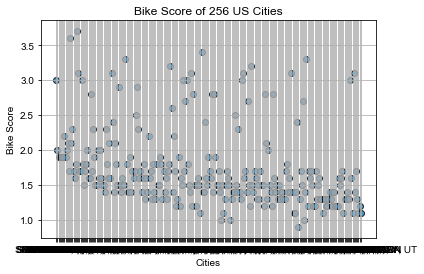

In [16]:
plt.scatter(data_table_to_use['City_Alt'], data_table_to_use['Total Points'], edgecolor='black', linewidths=1,
            marker='o',cmap='plasma', alpha=0.8, label="Bike Score")

plt.style.use('seaborn')
plt.title(f'Bike Score of 256 US Cities')
plt.ylabel("Bike Score")
plt.xlabel("Cities")
plt.grid(True)
plt.show()

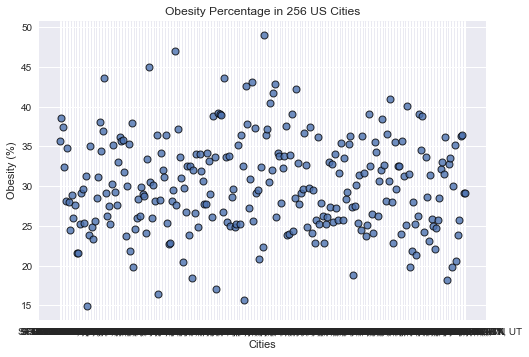

In [17]:
plt.scatter(data_table_to_use['City_Alt'], data_table_to_use['Obesity Rank'], edgecolor='black', linewidths=1,
            marker='o',cmap='viridis', alpha=0.8, label="Bike Score")

plt.style.use('seaborn-dark-palette')
plt.title(f'Obesity Percentage in 256 US Cities')
plt.ylabel("Obesity (%)")
plt.xlabel("Cities")
plt.grid(True)
plt.show()

In [18]:
plt.style.available[:15]

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook']

In [19]:
# add heat map here


In [20]:
# binning of bike score distribution 
bins_bike = [0, .4, .9, 1.4, 1.9, 2.4, 2.9, 3.4, 3.9, 8]
bins_name = ['<.5', '.5-.9', '1-1.4', '1.5-1.9', '2-2.4','2.5-2.9','3-3.4', '3.5-3.9', '>4']

#slice dtat and plact into bins
data_table_to_use['Total Points'] = pd.cut(data_table_to_use["Total Points"], bins_bike, labels=bins_name)

#group by total points and count by how many cities have total point in each bin
bin_group_bike = data_table_to_use.groupby('Total Points')
count_cat = bin_group_bike['Total Points'].count()

#create new df to show bin df
bike_analysis_df = pd.DataFrame(count_cat)
bike_analysis_df

C:\Users\wlaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Total Points
Total Points,
<.5,0
.5-.9,1
1-1.4,94
1.5-1.9,115
2-2.4,22
2.5-2.9,14
3-3.4,17
3.5-3.9,2
>4,0


In [21]:
#plt.bar(bike_analysis_df['Total Points'], bike_analysis_df['Total Points'])

In [22]:
# binning of chart of obesity rank distribution
bins_obesity = [0, 4, 9, 14, 19, 24, 29, 34, 39, 100]
bins_obesity_name = ['<4', '5-9', '10-14', '15-19', '20-24','25-29','30-34', '35-39', '>4']

#reset index from previous binning
data_table_to_use = data_table_to_use.reset_index(drop=True)

#group by total points and count by how many cities have total point in each bin
data_table_to_use['Obesity Rank'] = pd.cut(data_table_to_use["Obesity Rank"], bins_obesity, labels=bins_obesity_name)

bin_group_obesity = data_table_to_use.groupby('Obesity Rank')
count_cat = bin_group_obesity['Obesity Rank'].count()

obesity_analysis_df = pd.DataFrame(count_cat)
obesity_analysis_df

,Obesity Rank
Obesity Rank,
<4,0
5-9,0
10-14,0
15-19,7
20-24,28
25-29,85
30-34,79
35-39,48
>4,18


In [23]:
#Bar Chart

obesity_percentage = [14.9, 15.7, 16.0, 16.4, 17.1]
x_axis = np.arange(len(obesity_percentage))                  

Text(0,0.5,'Obesity (%)')

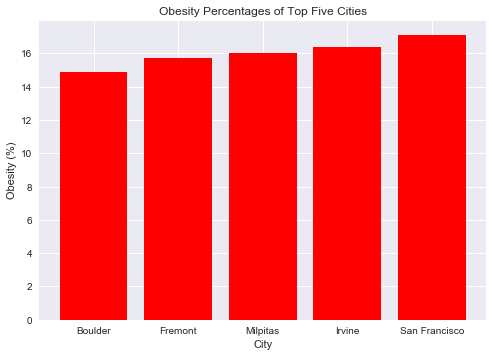

In [24]:
plt.bar(x_axis, obesity_percentage, color="r", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Boulder", "Fremont", "Milpitas", "Irvine", "San Francisco"])

plt.title("Obesity Percentages of Top Five Cities")
plt.xlabel("City")
plt.ylabel("Obesity (%)")

In [25]:
# Set x axis to numerical value for month

population = [14.9, 15.7, 16.0, 16.4, 17.1]
x_axis = np.arange(len(obesity_percentage))  

## Wasim Started Working from here

In [ ]:

import pandas as pd
obesity_data_rn[135:139]
dfxx=pd.concat(obesity_data_rn[:5],obesity_data_rn[136:137])
dfxx

In [26]:
# Preparing the x and y axis data for plot 

df0=obesity_data_rn[['City Name','Population']]
df0["Population"] = df0["Population"].str.replace(",","").astype(float)
df1=df0[:5]
df1=df1.sort_values('Population',ascending=True)
df1

C:\Users\wlaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,City Name,Population
2,Milpitas,66790.0
0,Boulder,97385.0
3,Irvine,212375.0
1,Fremont,214089.0
4,San Francisco,805235.0


Text(0,0.5,'Population')

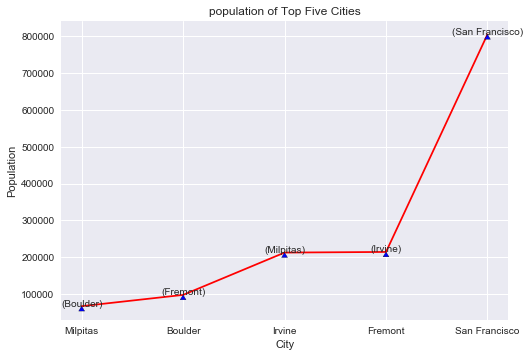

In [27]:
# First Plot

x_axis = df1['City Name']      #  bug corrected
y_axis= df1['Population']
plt.plot(x_axis, y_axis, color="r")

i=0
for xy in zip(x_axis, y_axis):                                       # <--
#     print(type(xy))
    plt.annotate('(%s)' % x_axis[i], xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='center') 
    i=i+1
    
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ['Boulder', 'Fremont', 'Milpitas', 'Irvine', 'San Francisco'])

plt.title("population of Top Five Cities")
plt.xlabel("City")
plt.ylabel("Population")

####  2nd Graph Data (OBESITY vs POPULATION)

In [28]:
# obesity_percentage = [14.9, 15.7, 16.0, 16.4, 17.1]
obesity_data_rn.head()
df2=obesity_data_rn[:5]
# obesity_data_rn['Obesity Rank'].head()
df2

,Year,StateAbbr,State,City Name,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Population,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


In [29]:
x_=df1['City Name']
x_[0]

'Boulder'

Text(0,0.5,'Population')

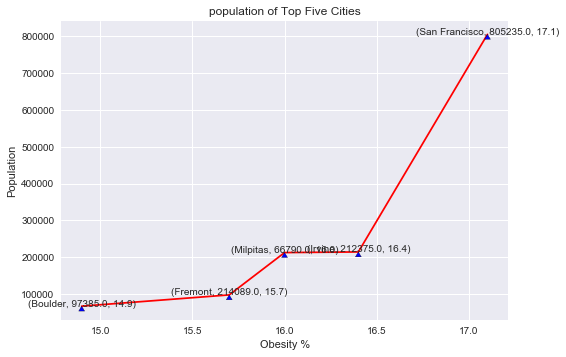

In [30]:
# 2nd Plot

# data_table_to_plot.plot(kind='line',x='City_Alt',y='Population_x', color='red')
#obesity_percentage = [14.9, 15.7, 16.0, 16.4, 17.1]

x_axis = df2['Obesity Rank']      
y_axis= df1['Population']
plt.plot(x_axis, y_axis, color="r")
i=0
x_= df1['City Name'] 
for xy in zip(x_axis, y_axis):
    # <--
#     print(type(xy))
    plt.annotate('(%s, %s, %s)' %(x_[i],y_axis[i],x_axis[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='center') 
    i=i+1
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ['Boulder', 'Fremont', 'Milpitas', 'Irvine', 'San Francisco'])

plt.title("population of Top Five Cities")
plt.xlabel("Obesity %")
plt.ylabel("Population")

### 3rd plot data (BIKE SCORE vs POPULATION)

In [31]:
# Bike_Score=data_table_to_use['Total Points']
pop_series= ['Milpitas', 'Boulder','Irvine','Fremont', 'San Francisco']
Bike_Score=['0','3.7','1.9','1.5','2.2']
y_axis= df1['Population']
y= list(y_axis)
df3=pd.DataFrame({'Bike_Score':Bike_Score,'Population':y,'city':pop_series})
df3b=df3.sort_values(by='Bike_Score')
df3b

,Bike_Score,Population,city
0,0,66790.0,Milpitas
3,1.5,214089.0,Fremont
2,1.9,212375.0,Irvine
4,2.2,805235.0,San Francisco
1,3.7,97385.0,Boulder


In [32]:
x_= list( df1['City Name'] )
x_

['Milpitas', 'Boulder', 'Irvine', 'Fremont', 'San Francisco']

Text(0,0.5,'Population')

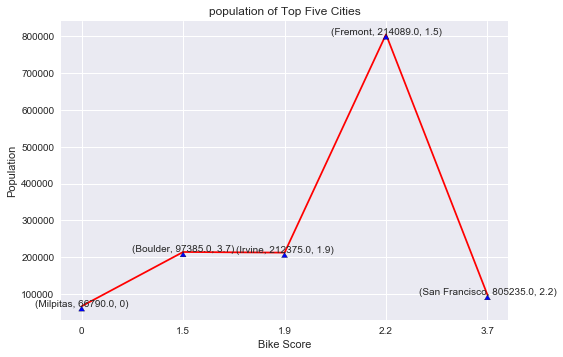

In [33]:
# 3rd Plot

x_axis = df3b['Bike_Score']    
y_axis= df3b['Population']
plt.plot(x_axis, y_axis, color="r")
i=0
x_=list( df1['City Name'] )
for xy in zip(x_axis, y_axis):
    # <--
#     print(type(xy))
    plt.annotate('(%s, %s, %s)' %(x_[i],y_axis[i],x_axis[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='center') 
    i=i+1

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ['Boulder', 'Fremont', 'Milpitas', 'Irvine', 'San Francisco'])

plt.title("population of Top Five Cities")
plt.xlabel("Bike Score")
plt.ylabel("Population")

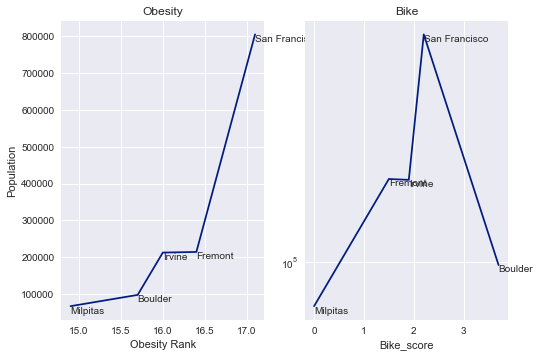

In [34]:
## two sub plots together

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
# np.random.seed(19680801)

# # make up some data in the interval ]0, 1[
# # y = np.random.normal(loc=0.5, scale=0.4, size=1000)
# # y = y[(y > 0) & (y < 1)]
# # y.sort()
# # x = np.arange(len(y))


# linear Obesity
labels1 = df1['City Name']  
n= list(labels1)

x1_Obesity = [14.9, 15.7, 16.0, 16.4, 17.1]     
y1_Obesity= [66790.0, 97385.0, 212375.0, 214089.0, 805235.0]



# plot with various axes scales
plt.figure()


plt.subplot(121)
plt.plot(x1_Obesity, y1_Obesity)
plt.yscale('linear')
plt.title('Obesity')
# plt.grid(True)
plt.xlabel("Obesity Rank")
plt.ylabel("Population")

for i, txt in enumerate(n):
    plt.annotate(txt, (x1_Obesity[i], y1_Obesity[i]),arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='left',verticalalignment='top')

    
# log Bike    
labels2=['Milpitas','Fremont','Irvine','San Francisco','Boulder']
n= list(labels2)
x2_Bike= [0, 1.5, 1.9, 2.2, 3.7] 
y2_Bike=[66790.0,214089.0,212375.0,805235.0,97385.0] 

plt.subplot(122)
plt.plot(x2_Bike, y2_Bike)
plt.yscale('log')
plt.title('Bike')
plt.grid(True)
plt.xlabel("Bike_score")
# plt.ylabel("Population")

for i, txt in enumerate(n):
    plt.annotate(txt, (x2_Bike[i], y2_Bike[i]),arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='left',verticalalignment='top')

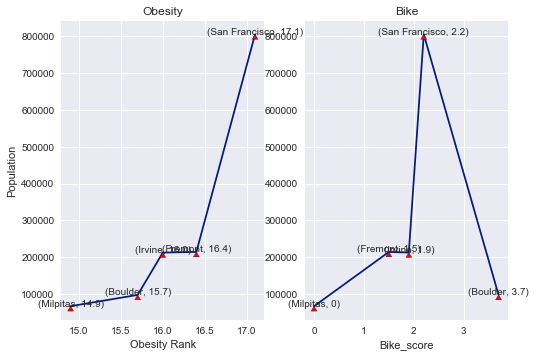

In [35]:
## two sub plots together

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
# np.random.seed(19680801)

# # make up some data in the interval ]0, 1[
# # y = np.random.normal(loc=0.5, scale=0.4, size=1000)
# # y = y[(y > 0) & (y < 1)]
# # y.sort()
# # x = np.arange(len(y))


# linear Obesity
labels1 = df1['City Name']  
n= list(labels1)

x1_Obesity = [14.9, 15.7, 16.0, 16.4, 17.1]     
y1_Obesity= [66790.0, 97385.0, 212375.0, 214089.0, 805235.0]



# plot with various axes scales
plt.figure()


plt.subplot(121)
plt.plot(x1_Obesity, y1_Obesity)
plt.yscale('linear')
plt.title('Obesity')
# plt.grid(True)
plt.xlabel("Obesity Rank")
plt.ylabel("Population")

i=0
x_=list( df1['City Name'] )
for xy in zip(x1_Obesity, y1_Obesity):
    # <--
#     print(type(xy))
    plt.annotate('(%s, %s)' %(x_[i],x1_Obesity[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='red',headwidth=5.9, headlength=4.9),horizontalalignment='center') 
    i=i+1

    
    
    
# log Bike    
labels2=['Milpitas','Fremont','Irvine','San Francisco','Boulder']
n= list(labels2)
x2_Bike= [0, 1.5, 1.9, 2.2, 3.7] 
y2_Bike=[66790.0,214089.0,212375.0,805235.0,97385.0] 

plt.subplot(122)
plt.plot(x2_Bike, y2_Bike)
plt.yscale('linear')
plt.title('Bike')
plt.grid(True)
plt.xlabel("Bike_score")
# plt.ylabel("Population")

i=0
x_=labels2
for xy in zip(x2_Bike, y2_Bike):
    # <--
#     print(type(xy))
    plt.annotate('(%s, %s)' %(x_[i],x2_Bike[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='red',headwidth=5.9, headlength=4.9),horizontalalignment='center') 
    i=i+1